In [2]:
from utils import *
import pandas as pd
from sklearn.datasets import make_friedman1, make_friedman2, make_friedman3
plt.style.use('seaborn-muted')
plt.rc('font', size=16, family='serif')
plt.rc('mathtext', default='it', fontset='cm')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Parametric Stuff

In [18]:
exp_out = load_data('./exp_2d_parametric')

In [34]:
depths=(2,3,10)
arrays = [
    # ['Parametric'], 
    # ['Ackley', 'Franke', 'Nonpoly'],
    #, 'Friedman 1', 'Friedman 2', 'Friedman 3'],
    [f'D={depths[0]}', f'D={depths[1]}', f'D={depths[2]}'],
    [False, True],  # Noise
]

index = pd.MultiIndex.from_product(
    arrays, names=["Depths", "Noise"])

df_sd = pd.DataFrame(
    index=index,
    columns=['bias', 'ell_lap', 'ell_gaus', 'c', 'noise']
)

df_rd = df_sd.copy(deep=True)

df_sd

bias ell_lap ell_gaus    c noise
Depths Noise                                 
D=2    False  NaN     NaN      NaN  NaN   NaN
       True   NaN     NaN      NaN  NaN   NaN
D=3    False  NaN     NaN      NaN  NaN   NaN
       True   NaN     NaN      NaN  NaN   NaN
D=10   False  NaN     NaN      NaN  NaN   NaN
       True   NaN     NaN      NaN  NaN   NaN

In [30]:
exp_out[3]['kernel']

{'C': 32.49542745759015,
 'W': None,
 'ell_lap': 1276.2494454604216,
 'ell_gaus': 0.654317836539293,
 'depth': 2,
 'bias': 8480.751297413626}

In [35]:
for exp in exp_out:
    if exp['dataset']['name'] == 'Parametric' and exp['dataset']['norm'] == True:
        noise = False if exp["dataset"]['noise'] == 0.0 else True

        df_sd['bias'][f"D={exp['kernel']['depth']}", noise] = exp['kernel']['bias']
        df_sd['ell_lap'][f"D={exp['kernel']['depth']}", noise] = exp['kernel']['ell_lap']
        df_sd['ell_gaus'][f"D={exp['kernel']['depth']}", noise] = exp['kernel']['ell_gaus']
        df_sd['c'][f"D={exp['kernel']['depth']}", noise] = exp['kernel']['C']

        if noise == True:
            df_sd['noise'][f"D={exp['kernel']['depth']}", noise] = exp['kernel']['W']

    elif exp['dataset']['name'] == 'Parametric' and exp['dataset']['norm'] == False:
        noise = False if exp["dataset"]['noise'] == 0.0 else True
        
        df_rd['bias'][f"D={exp['kernel']['depth']}", noise] = exp['kernel']['bias']
        df_rd['ell_lap'][f"D={exp['kernel']['depth']}", noise] = exp['kernel']['ell_lap']
        df_rd['ell_gaus'][f"D={exp['kernel']['depth']}", noise] = exp['kernel']['ell_gaus']
        df_rd['c'][f"D={exp['kernel']['depth']}", noise] = exp['kernel']['C']

        if noise == True:
            df_rd['noise'][f"D={exp['kernel']['depth']}", noise] = exp['kernel']['W']

In [36]:
df_sd

bias      ell_lap  ell_gaus          c     noise
Depths Noise                                                         
D=2    False  8480.751297  1276.249445  0.654318  32.495427       NaN
       True       0.00001     1.056884  0.841393   0.273396  0.791017
D=3    False   453.111409   765.133092  0.654022   21.51509       NaN
       True      0.000014     1.004623  0.824236    0.27224  0.791646
D=10   False   469.676068     0.370194  0.624938   6.694635       NaN
       True       0.00001     0.302567  0.215243   0.235086  0.817672

In [37]:
df_rd

bias        ell_lap   ell_gaus         c     noise
Depths Noise                                                        
D=2    False  3.277436  501466.953688  16.450088  4.705517       NaN
       True        0.0       3.694188   2.779026   0.05503  0.514109
D=3    False  2.927135  487965.828965  16.673008  3.321378       NaN
       True    0.00001       3.675482   2.750498  0.053926  0.514008
D=10   False  2.104104  883914.827868  19.513054  1.375396       NaN
       True        0.0       3.608108   2.588142  0.053271  0.522622

## 2D Function stuff

In [38]:
exp_out = load_data('exp_2d')

In [82]:
depths=(2,3,10)
arrays = [
    ['RMSE', r'$\rho$'],
    # ['Parametric'], 
    ['Ackley', 'Franke', 'Nonpoly'],
    #, 'Friedman 1', 'Friedman 2', 'Friedman 3'],
    [False, True],  # Noise
]

index = pd.MultiIndex.from_product(
    arrays, names=["Metrics", "Dataset", "Noise"])


df_rd = pd.DataFrame(
    index=index,
    columns=[f'D{depths[0]}lap', f'D{depths[0]}gaus', f'D{depths[1]}lap', f'D{depths[1]}gaus', f'D{depths[2]}lap', f'D{depths[2]}gaus'])

df_sd = df_rd.copy(deep=True)

df_sd

for exp in exp_out:
    depth = exp['kernel']['depth']
    name = exp['dataset']['name']
    noise = exp['dataset']['noise']

    if noise==0.0: 
        noisy = False 
    else: 
        noisy = True

    if name == 'Nonpolynomial':
        name = 'Nonpoly'

    if exp['dataset']['norm']:
        df_sd[f'D{depth}lap']['RMSE', name, noisy]  = exp['lap']['pred_rmse']
        df_sd[f'D{depth}gaus']['RMSE', name, noisy] = exp['gaus']['pred_rmse']
        df_sd[f'D{depth}lap'][r'$\rho$', name, noisy]  = exp['lap']['pred_corr']
        df_sd[f'D{depth}gaus'][r'$\rho$', name, noisy] = exp['gaus']['pred_corr']
        df_lap_sd[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_sd[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_sd[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_sd[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']
    else:
        df_lap_rd[f'D{depth}rmse'][name, noisy]  = exp['lap']['pred_rmse']
        df_lap_rd[f'D{depth}corr'][name, noisy]  = exp['lap']['pred_corr']
        df_gaus_rd[f'D{depth}rmse'][name, noisy] = exp['gaus']['pred_rmse']
        df_gaus_rd[f'D{depth}corr'][name, noisy] = exp['gaus']['pred_corr']

NameError: name 'df_lap_rd' is not defined

In [55]:
exp_out[4]['kernel']

{'C': 3335.029555168131,
 'W': None,
 'ell_lap': 1.8444927515249687,
 'ell_gaus': 0.000373682728566409,
 'depth': 3,
 'bias': 35739.264889655955}

{'C': 3335.029555168131, 'W': None, 'ell_lap': 1.8444927515249687, 'ell_gaus': 0.000373682728566409, 'depth': 3, 'bias': 35739.264889655955} True


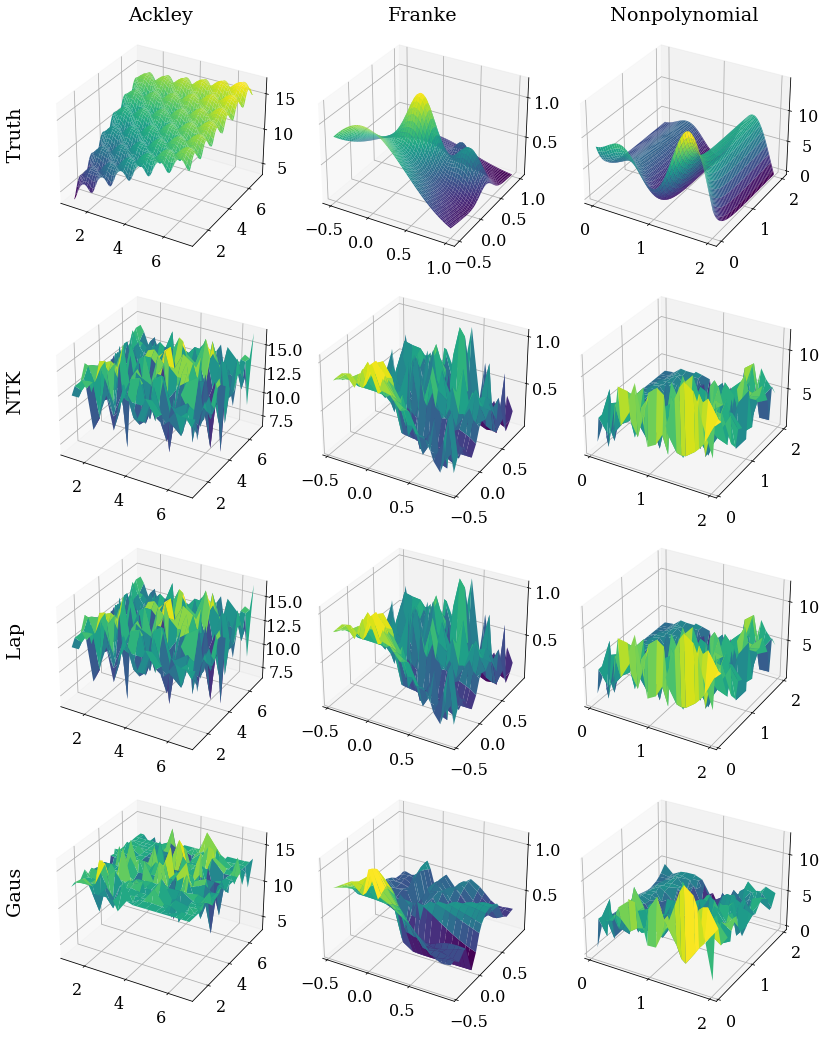

In [56]:
# Rd D=3  1, 13, 25
# Sd D=3  4, 16, 28 (+3)
# Sd D=10 5, 17, 29 (+4)
# Rd, noisy (+5)
# Sd, noisy (+8)
offset = 3
i, j, k = 1 + offset, 13 + offset, 25 + offset
exps = [exp_out[i], exp_out[j], exp_out[k]]
print(exp_out[i]['kernel'], exp_out[i]['dataset']['norm'])

fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(12,14.5), subplot_kw={'projection': '3d'})
ax = ax.ravel()
for a in ax:
    a.patch.set_alpha(0)

for a, name in zip(ax[0:3], ['Ackley', 'Franke', 'Nonpolynomial']):
    a.set_title(name)

tmp = np.linspace(1, 7, 100)
X, Y = np.meshgrid(tmp, tmp)

Z = -20*np.exp(-0.2 * np.sqrt(0.5*(X**2 + Y**2))) - np.exp(0.5 *(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y))) + np.e + 20
ax[0].plot_surface(X, Y, Z, cmap='viridis')

tmp = np.linspace(-0.5, 1, 100)
X, Y = np.meshgrid(tmp, tmp)

Z = (0.75*np.exp(- (9*X - 2)**2/4 - (9*Y - 2)**2/4) + 
        0.75*np.exp(- (9*X + 1)**2/49 - (9*Y + 1)/10) +
        0.5*np.exp(- (9*X - 7)**2/4  - (9*Y - 3)**2/4) +
        0.2*np.exp(- (9*X - 4)**2    - (9*Y - 7)**2))
ax[1].plot_surface(X, Y, Z, cmap='viridis')

tmp = np.linspace(0, 2, 100)
X, Y = np.meshgrid(tmp, tmp)

Z = 1/6 * ((30+5*X*np.sin(5*X))*(4+np.exp(-5*Y)) - 100)
ax[2].plot_surface(X, Y, Z, cmap='viridis')


fig.supylabel('Gaus                                  Lap                                  NTK                                  Truth', x=0.04)



ax[3].plot_surface(exps[0]['dataset']['draw'][:,0].reshape(-1,20), exps[0]['dataset']['draw'][:,1].reshape(-1,20), exps[0]['means'][0].reshape(-1,20), cmap='viridis')
ax[4].plot_surface(exps[1]['dataset']['draw'][:,0].reshape(-1,20), exps[1]['dataset']['draw'][:,1].reshape(-1,20), exps[1]['means'][0].reshape(-1,20), cmap='viridis')
ax[5].plot_surface(exps[2]['dataset']['draw'][:,0].reshape(-1,20), exps[2]['dataset']['draw'][:,1].reshape(-1,20), exps[2]['means'][0].reshape(-1,20), cmap='viridis')

ax[6].plot_surface(exps[0]['dataset']['draw'][:,0].reshape(-1,20), exps[0]['dataset']['draw'][:,1].reshape(-1,20), exps[0]['means'][1].reshape(-1,20), cmap='viridis')
ax[7].plot_surface(exps[1]['dataset']['draw'][:,0].reshape(-1,20), exps[1]['dataset']['draw'][:,1].reshape(-1,20), exps[1]['means'][1].reshape(-1,20), cmap='viridis')
ax[8].plot_surface(exps[2]['dataset']['draw'][:,0].reshape(-1,20), exps[2]['dataset']['draw'][:,1].reshape(-1,20), exps[2]['means'][1].reshape(-1,20), cmap='viridis')

ax[9].plot_surface(exps[0]['dataset']['draw'][:,0].reshape(-1,20), exps[0]['dataset']['draw'][:,1].reshape(-1,20), exps[0]['means'][2].reshape(-1,20), cmap='viridis')
ax[10].plot_surface(exps[1]['dataset']['draw'][:,0].reshape(-1,20), exps[1]['dataset']['draw'][:,1].reshape(-1,20), exps[1]['means'][2].reshape(-1,20), cmap='viridis')
ax[11].plot_surface(exps[2]['dataset']['draw'][:,0].reshape(-1,20), exps[2]['dataset']['draw'][:,1].reshape(-1,20), exps[2]['means'][2].reshape(-1,20), cmap='viridis')

fig.tight_layout()
fig.savefig(f"./exp/2D/2d{'S' if exp_out[i]['dataset']['norm'] else 'R'}dD{exp_out[i]['kernel']['depth']}.svg")

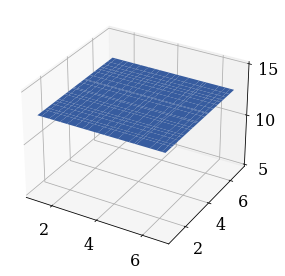

In [75]:
exps = [exp_out[9]]
fig, ax = plt.subplots(1,1, figsize=(4.5,4), subplot_kw={'projection': '3d'})
ax.patch.set_alpha(0)
ax.ticklabel_format(useOffset=False)

cax = ax.plot_surface(exps[0]['dataset']['draw'][:,0].reshape(-1,20), exps[0]['dataset']['draw'][:,1].reshape(-1,20), exps[0]['means'][0].reshape(-1,20))#, cmap='viridis')
ax.set_zticks([5, 10, 15])
# ax.set_zticklabels(["~12.67"])
# fig.colorbar(cax, ax=ax)
fig.tight_layout()
fig.savefig('./exp/2D/2dSdNoisyD2.svg')